In [1]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
from matplotlib import pyplot as plt
from joblib import load, dump

In [2]:
# Download datasets if not present
import os
import requests as r
import gzip

if not os.path.exists('./dataset'):
    os.makedirs('./dataset')
    print('create')

urls = [
    'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
    'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
    'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
    'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
]

file_names = []

for url in urls:
    file = './dataset/' + url.split('/')[-1]
    file_names.append(file)

    if os.path.exists(file):
        continue
        
    res = r.get(url)
    with open(file, 'wb') as f:
        f.write(res.content)

5


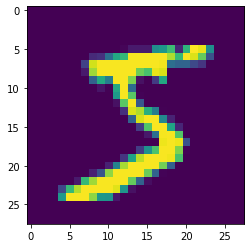

In [3]:
# Load datasets in memory
train_X = np.array([])
train_y = np.array([])
test_X = np.array([])
test_y = np.array([])


for file in file_names:
    with gzip.open(file, 'r') as f:
        if 'images' in file:
            f.read(16)
            buf = f.read()
            data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32).reshape(-1, 28, 28)
            plt.imshow(data[0])
            
            if 'train' in file:
                train_X = np.array(data)
            else:
                test_X = np.array(data)

        else:
            f.read(8)
            buf = f.read()
            data = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

            if 'train' in file:
                train_y = np.array(data)
            else:
                test_y = np.array(data)

plt.imshow(train_X[0])
print(train_y[0])

train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

In [4]:
try:
    model = load('model.joblib')
except FileNotFoundError:
    model = SVC(verbose=True, probability=True)
    model.fit(train_X, train_y)

In [5]:
dump(model, 'model.joblib')

['model.joblib']

In [6]:
model.score(test_X, test_y)

0.9792

In [7]:
y_hat = model.predict(test_X)

In [8]:
out = model.predict_proba(test_X)

In [9]:
print(classification_report(test_y, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

